In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from dac_analysis import get_df
from dac_config import groups, scale

df = get_df("data.csv")

df

# likerts = df[[c for c in df.columns if c.endswith(".")]]

,Geschlecht,Altersgruppe,Höchster Bildungsabschluss,Beruf,Bundesland,Der Klimawandel findet tatsächlich statt.,Der Klimawandel ist ein ernstes Problem.,Menschliche Aktivitäten sind die Hauptursache des Klimawandels.,"Wir alle sollten uns bemühen, unseren CO2-Ausstoß zu reduzieren.",Haben Sie schon von Technologien zur Entnahme von Kohlendioxid (CO2) aus der Luft (auf Englisch Direct Air Capture (DAC)) gehört?,...,Industrie,Wissenschaft,Vereinte Nationen (UNO),Europäische Union,Nichtregierungs- und Umweltschutzorganisationen,Medien,Direct Air Capture (DAC).1,CO2-Speicherung.1,Ihre E-Mail Adresse,completion_time
ID,,,,,,,,,,,,,,,,,,,,,
91895076,Weiblich,40 - 49,Master (MSc.) oder Diplom,Angestellt,Hamburg,Stimme voll und ganz zu,Stimme voll und ganz zu,Stimme voll und ganz zu,Stimme voll und ganz zu,Ja,...,Geringes Vertrauen,Starkes Vertrauen,Starkes Vertrauen,Starkes Vertrauen,Starkes Vertrauen,Mäßiges Vertrauen,Voll und ganz,Etwas,NaN,0 days 00:42:23
91892879,Weiblich,40 - 49,Promotion (Dr.) oder Habilitation (Prof.),Angestellt,Bremen,Stimme voll und ganz zu,Stimme voll und ganz zu,Stimme voll und ganz zu,Stimme voll und ganz zu,Ja,...,Geringes Vertrauen,Starkes Vertrauen,Neutral,Neutral,Starkes Vertrauen,Geringes Vertrauen,Etwas,Neutral,NaN,0 days 04:11:39
91892810,Männlich,20 - 29,Promotion (Dr.) oder Habilitation (Prof.),Angestellt,Hamburg,Stimme voll und ganz zu,Stimme voll und ganz zu,Stimme voll und ganz zu,Stimme voll und ganz zu,Ja,...,Geringes Vertrauen,Mäßiges Vertrauen,Mäßiges Vertrauen,Mäßiges Vertrauen,Mäßiges Vertrauen,Geringes Vertrauen,Neutral,Neutral,NaN,0 days 00:05:46
91892329,Männlich,40 - 49,Master (MSc.) oder Diplom,Angestellt,Hamburg,Stimme voll und ganz zu,Stimme voll und ganz zu,Stimme zu,Stimme voll und ganz zu,Ja,...,Geringes Vertrauen,Starkes Vertrauen,Starkes Vertrauen,Mäßiges Vertrauen,Starkes Vertrauen,Mäßiges Vertrauen,Etwas,Neutral,NaN,0 days 00:04:20
91892169,Weiblich,40 - 49,Master (MSc.) oder Diplom,Öffentlicher Dienst,Schleswig-Holstein,Stimme voll und ganz zu,Stimme voll und ganz zu,Stimme zu,Stimme voll und ganz zu,Ja,...,Geringes Vertrauen,Starkes Vertrauen,Starkes Vertrauen,Mäßiges Vertrauen,Mäßiges Vertrauen,Geringes Vertrauen,Etwas,Etwas,NaN,0 days 00:08:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85632251,Männlich,40 - 49,Promotion (Dr.) oder Habilitation (Prof.),Öffentlicher Dienst,Niedersachsen,Stimme voll und ganz zu,Stimme voll und ganz zu,Stimme voll und ganz zu,Stimme zu,Ja,...,Geringes Vertrauen,Neutral,Neutral,Geringes Vertrauen,Mäßiges Vertrauen,Neutral,Etwas,Etwas,NaN,0 days 21:56:18
85598277,Männlich,40 - 49,Promotion (Dr.) oder Habilitation (Prof.),Öffentlicher Dienst,Hamburg,Stimme voll und ganz zu,Stimme voll und ganz zu,Stimme voll und ganz zu,Stimme voll und ganz zu,Ja,...,Überhaupt kein Vertrauen,Überhaupt kein Vertrauen,Geringes Vertrauen,Geringes Vertrauen,Geringes Vertrauen,Geringes Vertrauen,Etwas,Etwas,NaN,0 days 00:27:27
85587504,Männlich,20 - 29,Master (MSc.) oder Diplom,Öffentlicher Dienst,Hamburg,Stimme voll und ganz zu,Stimme voll und ganz zu,Stimme voll und ganz zu,Stimme voll und ganz zu,Ja,...,Geringes Vertrauen,Starkes Vertrauen,Neutral,Neutral,Mäßiges Vertrauen,Neutral,Etwas,Etwas,NaN,1 days 01:01:49


In [30]:
list(df.columns)

['Geschlecht',
 'Altersgruppe',
 'Höchster Bildungsabschluss',
 'Beruf',
 'Bundesland',
 'Der Klimawandel findet tatsächlich statt.',
 'Der Klimawandel ist ein ernstes Problem.',
 'Menschliche Aktivitäten sind die Hauptursache des Klimawandels.',
 'Wir alle sollten uns bemühen, unseren CO2-Ausstoß zu reduzieren.',
 'Haben Sie schon von Technologien zur Entnahme von Kohlendioxid (CO2) aus der Luft (auf Englisch Direct Air Capture (DAC)) gehört?',
 'Wie gut sind ihre Kenntnisse dieser Technologien?',
 'Haben Sie schon von Kohlendioxid (CO2)-Speicherung gehört?',
 'Wie gut sind ihre Kenntnisse der CO2-Speicherungstechnologien?',
 'Direct Air Capture (DAC)',
 'CO2-Speicherung',
 'Welche Hauptemotion empfinden Sie gegenüber DAC-Technologien?',
 'DAC ist eine ausgereifte saubere Technologie.',
 'Menschen sollten die Natur nicht auf diese Weise manipulieren.',
 'Ich denke nicht, dass das Einbringen von CO2 in den Boden eine gute Idee ist.',
 'Versuche, das Klimasystem durch die Anwendung von 

In [28]:
df["Direct Air Capture (DAC)"]

ID
91895076         Etwas
91892879       Neutral
91892810       Neutral
91892329         Etwas
91892169         Etwas
               ...    
85632251         Etwas
85598277         Etwas
85587504         Etwas
85585675    Eher nicht
85583830         Etwas
Name: Direct Air Capture (DAC), Length: 149, dtype: object

In [23]:
import pprint

pprint.pprint(groups)

{'Climate Change': {'Der Klimawandel findet tatsächlich statt.',
                    'Der Klimawandel ist ein ernstes Problem.',
                    'Menschliche Aktivitäten sind die Hauptursache des '
                    'Klimawandels.',
                    'Wir alle sollten uns bemühen, unseren CO2-Ausstoß zu '
                    'reduzieren.'},
 'DAC Awareness': {'Haben Sie schon von Technologien zur Entnahme von '
                   'Kohlendioxid (CO2) aus der Luft (auf Englisch Direct Air '
                   'Capture (DAC)) gehört?'},
 'Tampering': {'Ich denke nicht, dass das Einbringen von CO2 in den Boden eine '
               'gute Idee ist.',
               'Menschen sollten die Natur nicht auf diese Weise manipulieren.',
               'Versuche, das Klimasystem durch die Anwendung von DAC zu '
               'beeinflussen, zeugen von menschlichem Hochmut.'}}


In [19]:
df.completion_time

ID
91895076   0 days 00:42:23
91892879   0 days 04:11:39
91892810   0 days 00:05:46
91892329   0 days 00:04:20
91892169   0 days 00:08:03
                 ...      
85632251   0 days 21:56:18
85598277   0 days 00:27:27
85587504   1 days 01:01:49
85585675   0 days 04:22:54
85583830   0 days 00:23:03
Name: completion_time, Length: 149, dtype: timedelta64[ns]

/Users/Buntemey/miniforge3/envs/dac/lib/python3.10/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/Users/Buntemey/miniforge3/envs/dac/lib/python3.10/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]
/Users/Buntemey/miniforge3/envs/dac/lib/python3.10/site-packages/plot_likert/plot_likert.py:313: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the sa

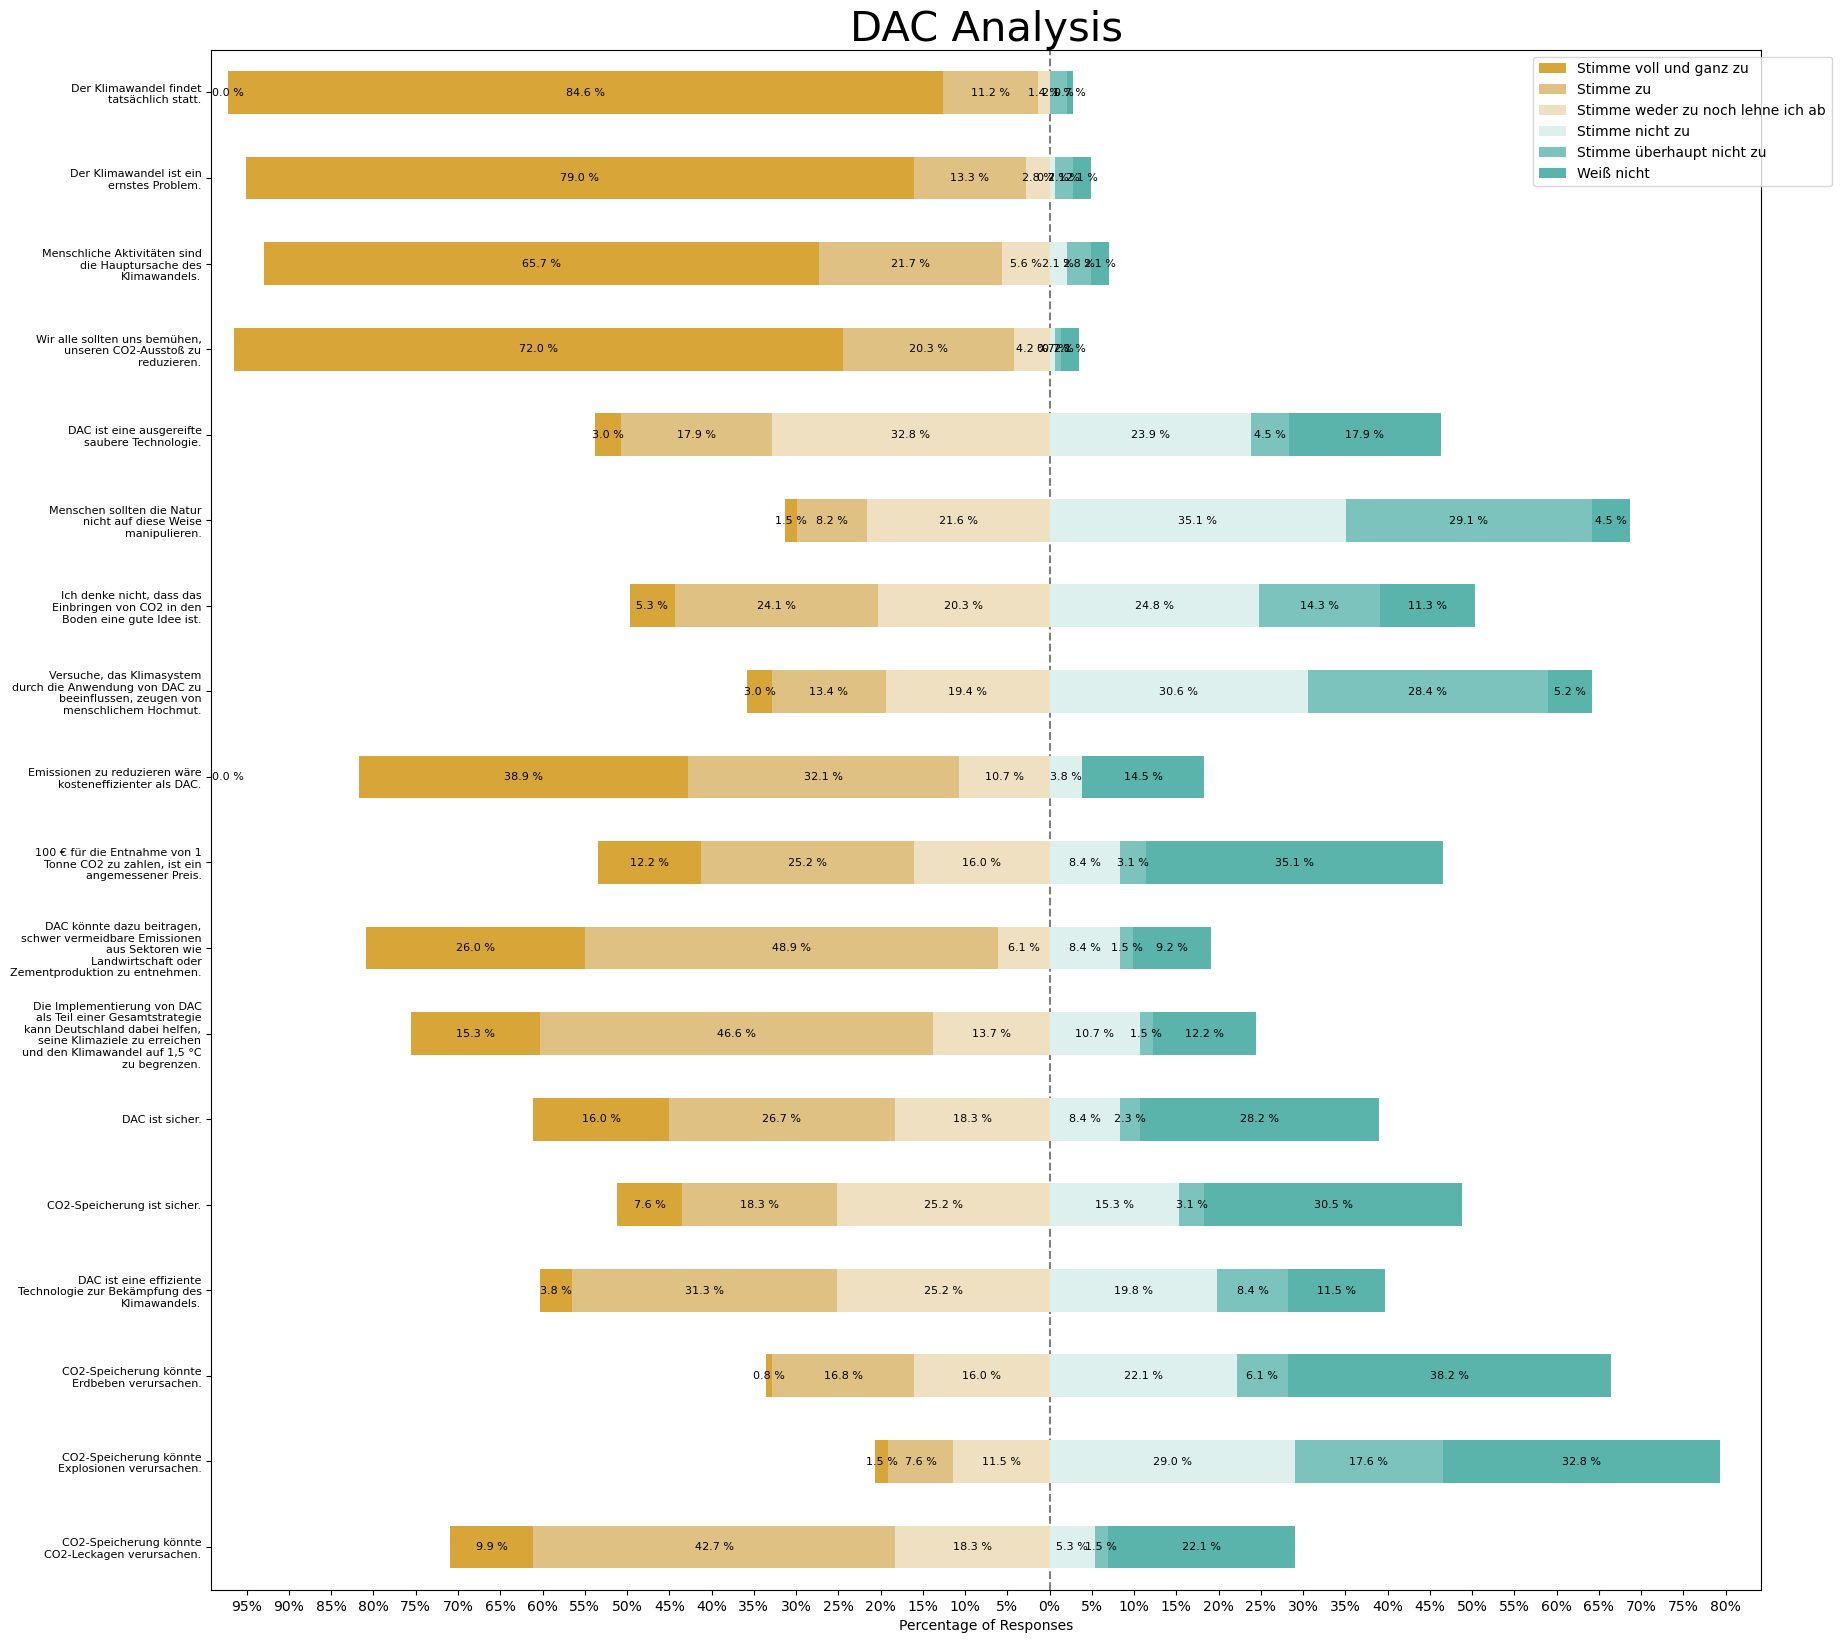

In [18]:
import pandas as pd

# pip install plot-likert
# https://stackoverflow.com/questions/70975856/adding-percentages-to-subgroups-of-each-group-likert-scale-python
import plot_likert

# create a likert plot
ax1 = plot_likert.plot_likert(
    likerts,
    scale,
    plot_percentage=True,
    # bar_labels=True,
    # bar_labels_color="snow",
    figsize=(20, 20),
    colors=plot_likert.colors.likert6,
)
ax1.set_title(("DAC Analysis"), fontsize=30)
# ax1.set_ylabel('Question regarding DAC',fontdict={'fontsize':12})
# ax1.set_xlabel('% Breakdown',fontdict={'fontsize':12})
ax1.tick_params(axis="y", labelsize=8)
ax1.tick_params(axis="x", labelsize=10)

for bars, color in zip(ax1.containers[1:], ["black"] + ["black"] * 2 + ["black"] * 3):
    ax1.bar_label(bars, label_type="center", fmt="%.1f %%", color=color, fontsize=8)